# Cryptocurrency Fall of May 2021

- Cryptocurrency serves as a digital asset and is a medium of exchange between individuals where coin ownership records are stored in a secure computerized database. They are named as such because complicated cryptography helps in creating and processing these digital currencies and transactions across decentralized systems.
- The Crypto market was on the rise in the pandemic season. Since mid-2020, almost all cryptocurrencies were on the rise. The social media was all buzzed up on bitcoin and the other cryptocurrencies. Let us try to look at the data of some important cryptocurrencies and have a look at what really happened.

# Importing Packages

In [5]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import yfinance as yf
import plotly.express as px #pip install plotly

In [6]:
# We set the starting and ending dates of the data.
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021,5,29)

In [7]:
btc = yf.download("BTC-USD",start,end)
btc.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


# Bitcoin
“BTC-USD” indicates Bitcoin prices in US dollars. So we extract bitcoin prices.

In [8]:
#bitcoin
crypto= btc[['Date','Adj Close']]
crypto= crypto.rename(columns = {'Adj Close':'BTC'})

In [9]:
# 7 day moving average

crypto['BTC_7DAY_MA'] = crypto.BTC.rolling(7).mean()

A rolling average or moving average is a way to analyze data points by creating a series of averages of the data already present in the data. Here we calculate average prices based on the previous 7 days’ data of Bitcoin price. Moving averages are often used in technical analysis.

# Ethereum
Next, we try Ethereum. Ethereum is the 2nd largest cryptocurrency by market cap, after bitcoin. Ethereum went live on 30 July 2015 with 72 million coins.

In [11]:
eth = yf.download("ETH-USD",start,end)  # Collects data
eth.reset_index(inplace=True)
crypto["ETH"]= eth["Adj Close"]

# 7 day moving average
crypto[ 'ETH_7DAY_MA' ] = crypto.ETH.rolling( 7).mean()

[*********************100%***********************]  1 of 1 completed


# Dogecoin

Similarly, Dogecoin was another cryptocurrency that rose to fame was Dogecoin. In February 2021, when Elon Musk and many other celebrities tweeted about Dogecoin, the value of the coin shot up suddenly. And Dogecoin, unlike Bitcoin or Ethereum has technically no use. It is a meme cryptocurrency.

In [12]:
doge = yf.download("DOGE-USD",start,end)  # Collects data
doge.reset_index(inplace=True)
crypto["DOGE"]= doge["Adj Close"]

# 7 day moving average
crypto[ 'DOGE_7DAY_MA' ] = crypto.DOGE.rolling( 7).mean()

[*********************100%***********************]  1 of 1 completed


# BinanceCoin
Next, we proceed with Binance Coin. Binance was launched in July 2017 and is based on the Ethereum network. But Binance has its own blockchain, the Binance chain.

In [13]:
bnb = yf.download("BNB-USD",start,end)  # Collects data
bnb.reset_index(inplace=True)
crypto["BNB"]= bnb["Adj Close"]

# 7 day moving average
crypto['BNB_7DAY_MA'] = crypto.BNB.rolling(7).mean()

[*********************100%***********************]  1 of 1 completed


# Cardano
Next, we take Cardano. Cardano is a public blockchain platform and peer-to-peer transactions are facilitated by its cryptocurrency ADA. It was launched in September 2017.

In [14]:
ada = yf.download("ADA-USD",start,end)  # Collects data
ada.reset_index(inplace=True)
crypto["ADA"]= ada["Adj Close"]

# 7 day moving average
crypto['ADA_7DAY_MA'] = crypto.ADA.rolling(7).mean()

[*********************100%***********************]  1 of 1 completed


# Ripple
Ripple is a payment system and currency exchange platform that can be used to process transactions all over the globe. XRP is deducted as a small fee, whenever users make a transaction using Ripple.

In [15]:
xrp = yf.download("XRP-USD",start,end) # Collects data
xrp.reset_index(inplace=True)
crypto["XRP"]= xrp["Adj Close"]

# 7 day moving average
crypto['XRP_7DAY_MA'] = crypto.XRP.rolling(7).mean()

[*********************100%***********************]  1 of 1 completed


# DASH
Dash is an open-source cryptocurrency. It was forked from the Bitcoin protocol. It was launched in January 2014.

In [17]:
dash = yf.download("DASH-USD",start,end)  # Collects data
dash.reset_index(inplace=True)
crypto["DASH"]= dash["Adj Close"]

# 7 day moving average
crypto['DASH_7DAY_MA'] = crypto.DASH.rolling(7).mean()

[*********************100%***********************]  1 of 1 completed


**Now, with the data at hand, we format the dates.**

In [18]:
#getting the dates 
crypto.set_index("Date", inplace=True)

In [19]:
#Let's have a look at the data.
crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH']].head()

,BTC,ETH,DOGE,BNB,ADA,XRP,DASH
Date,,,,,,,
2020-12-31,29001.720703,737.803406,0.004682,37.376034,0.181397,0.219846,99.605362
2021-01-01,29374.152344,730.367554,0.005685,37.905010,0.175350,0.237444,88.241707
2021-01-02,32127.267578,774.534973,0.010615,38.241592,0.177423,0.221655,86.969772
2021-01-03,32782.023438,975.507690,0.009771,41.148979,0.204995,0.225848,89.069138
2021-01-04,31971.914062,1040.233032,0.009767,40.926353,0.224762,0.236677,88.797173


**We can see here that the data has been properly extracted.**

In [21]:
crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH']].corr()

,BTC,ETH,DOGE,BNB,ADA,XRP,DASH
BTC,1.000000,0.472852,0.252901,0.695960,0.627961,0.533070,0.781714
ETH,0.472852,1.000000,0.916328,0.882589,0.837967,0.865459,0.840651
DOGE,0.252901,0.916328,1.000000,0.799364,0.727957,0.827837,0.719309
BNB,0.695960,0.882589,0.799364,1.000000,0.845835,0.933032,0.913201
ADA,0.627961,0.837967,0.727957,0.845835,1.000000,0.757349,0.816664
XRP,0.533070,0.865459,0.827837,0.933032,0.757349,1.000000,0.825167
DASH,0.781714,0.840651,0.719309,0.913201,0.816664,0.825167,1.000000


### Observations:
- All the data points have a high correlation with each other. Let us just compare bitcoin to the others, even the lowest correlation with DOGE is 0.237, which is quite a good value. Dash being forked from BTC, has the highest correlation with BTC at 0.77.

- Looking at other data points, BNB and XRP have a high correlation of 0.93 which is extremely high. It is as if, they are the same value.

<AxesSubplot:>

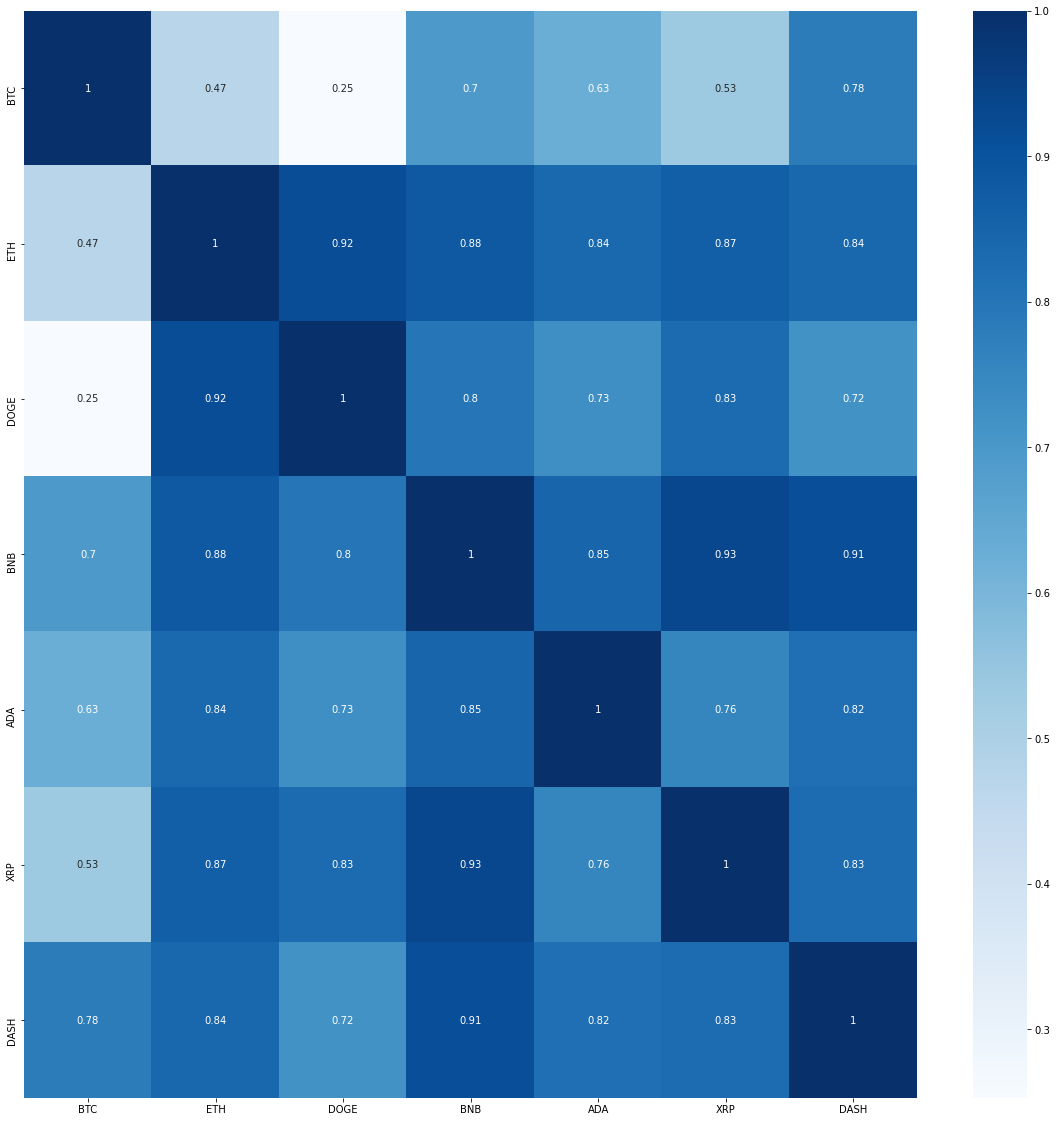

In [23]:
# Let's look at the correlation heatmap.

plt.figure(figsize = (20,20))
sns.heatmap(crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH']].corr(),annot=True, cmap='Blues')

The heatmap clearly shows the high correlation between the prices of all cryptocurrencies.

In [25]:
# Let us plot the data using Plotly express.
fig = px.line(crypto, y=["BTC",'ETH','DOGE','BNB','ADA','XRP','DASH'] )
fig.show()

Well, only the BTC crash in mid-May 2021 is clear. But let us have a look at BTC 7 day moving average values.

In [26]:
fig = px.line(crypto, y=['BTC_7DAY_MA'] )
fig.show()

# Observation:
- Here, it is clearly visible that the BTC price suddenly increased in Feb 2021 after all those tweets and social media buzz. And suddenly in May 2021, everything came crashing.

In [27]:
# Let's see Ethereum
fig = px.line(crypto, y=['ETH'] )
fig.show()

In [28]:
# Moving Average values:
fig = px.line(crypto, y=['ETH_7DAY_MA'] )
fig.show()

# Observation: 
- ETH also follows a similar pattern. In April 2021 end, everyone saw the sudden rise in prices of BTC and DOGE and bought ETH. This led to a sudden increase in the price of ETH as well.
- The mountain fell down as quickly as it rose. People who bought at the high faced enormous losses.

In [30]:
# Let's see DOGECOIN
fig = px.line(crypto, y=['DOGE'] )
fig.show()

In [31]:
fig = px.line(crypto, y=['DOGE_7DAY_MA'] )
fig.show()

In [32]:
# Let's see BINANCE COIN
fig = px.line(crypto, y=['BNB'] )
fig.show()

In [33]:
fig = px.line(crypto, y=['BNB_7DAY_MA'] )
fig.show()

In [34]:
# Let's see CARDANO
fig = px.line(crypto, y=['ADA'] )
fig.show()

In [35]:
fig = px.line(crypto, y=['ADA_7DAY_MA'] )
fig.show()

In [36]:
# Let's see RIPPLE XRP
fig = px.line(crypto, y=['XRP'] )
fig.show()

In [37]:
fig = px.line(crypto, y=['XRP_7DAY_MA'] )
fig.show()

In [38]:
# Let's see DASH
fig = px.line(crypto, y=['DASH'] )
fig.show()

In [41]:
fig = px.line(crypto, y=['DASH_7DAY_MA'])
fig.show()

# Conclusion

- With Above analysis we can conclude what caused the crash in crypto world. The entire crypto market seems to related to each other. 

- People see someone buying BTC, they go buy ETH. Someone sells DOGE, they also sell their BTC. It is all interrelated.

- The crypto market is highly volatile, various factors lead to the frenzied selloff. 

**Example :-** 
1) One of the largest cryptocurrency exchanges in the world, Coinbase faced service disruptions during this selloff.

2) Many Crypto investors had invested because they thought Tesla and Elon musk was into Bitcoin and thought of it as the next thing in finance and currency.